In [1]:
import numpy as np
from max_cut import *
from mc_graph import *
from qaoa import *
%load_ext autoreload
%autoreload 2

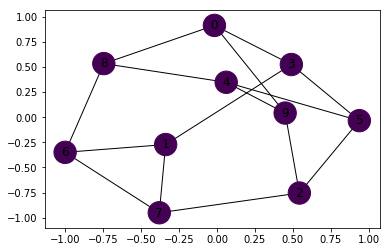

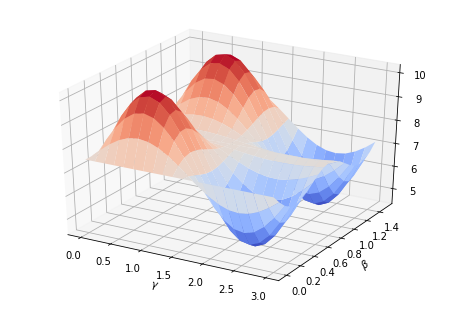

In [3]:
g = mc_graph()
g.generate_list([(2, 7), (2, 9), (2, 5), (6, 7), (1, 7), (1, 3), (1, 6), (0, 3), (3, 5), (6, 8), (4, 9), (4, 8), (4, 5), (0, 9), (0, 8)])
g.plot()
mc = max_cut(g)
mc.clauses = [[2, 7], [2, 9], [2, 5], [6, 7], [1, 7], [1, 3], [1, 6], [0, 3], [3, 5], [6, 8], [4, 9], [4, 8], [4, 5], [0, 9], [0, 8]]
mc.solve_qaoa_lattice(20,1)

In [8]:
rewards = mc.solve_qaoa_lattice(10,2)

In [14]:
np.amax(rewards)

10.908849078298644

In [16]:
np.argwhere(rewards==10.908849078298644)

array([[3, 8, 9, 6]], dtype=int64)

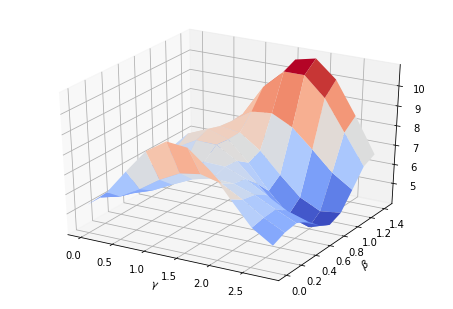

In [17]:
mc.plot_rewards_surface(10,rewards[3,8,:,:])

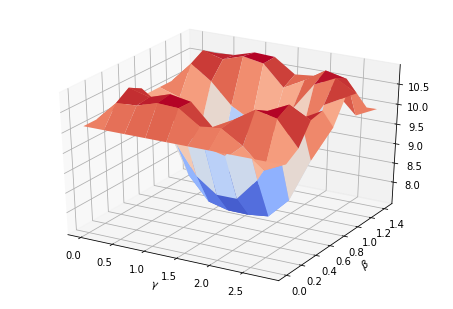

In [25]:
propagated_rewards = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        propagated_rewards[i,j] = np.amax(rewards[i,j,:,:])
mc.plot_rewards_surface(10,propagated_rewards)
        